In [ ]:
import pandas as pd
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)

dataset = dataset.dropna()
dataset

In [3]:
# drop too low levels
lowlevel = 8
for i in range(1,9):
    dataset.iloc[:,i] = [0 if j < lowlevel else j for j in dataset.iloc[:,i]]
dataset

,mm,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,offsetx
0,45.0,137.0,12.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
1,45.1,148.0,17.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
2,45.2,154.0,23.0,19.0,37.0,13.0,21.0,45.0,23.0,-12.0
3,45.3,169.0,24.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
4,45.4,183.0,16.0,18.0,37.0,13.0,21.0,45.0,23.0,-12.0
...,...,...,...,...,...,...,...,...,...,...
9004,144.6,50.0,18.0,18.0,37.0,13.0,21.0,46.0,7484.0,12.0
9005,144.7,50.0,26.0,18.0,37.0,13.0,21.0,46.0,7367.0,12.0
9006,144.8,50.0,20.0,18.0,37.0,13.0,21.0,46.0,7327.0,12.0
9007,144.9,50.0,13.0,18.0,37.0,12.0,21.0,46.0,7218.0,12.0


In [335]:
# generate standardized
#origcols = []
#for i in range(1,9):
#    origcols.append(f'ch{i}')
#    #dataset[f'ch_norm_{i}'] = (dataset[f'ch{i}'] - dataset[f'ch{i}'].mean()) / dataset[f'ch{i}'].std()
#    dataset[f'ch_norm_{i}'] = dataset[f'ch{i}'] / dataset[f'ch{i}'].max()
#
#dataset.drop(origcols, axis=1, inplace=True)
#    
#print(dataset)


In [336]:
dataset.shape

(9009, 10)

In [337]:
data = dataset.sample(frac=0.5, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

data['offsetx_abs'] = data.offsetx.abs()


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4504, 11)
Unseen Data For Predictions: (4505, 10)


In [338]:
from pycaret.regression import *

In [339]:
#? setup

In [340]:
exp_reg101 = setup(data = data, 
                   transformation=False, 
                   target = 'mm', 
                   pca = False,
                   polynomial_features=False,
                   polynomial_degree=3,
                   remove_outliers=False,
                   outliers_threshold=0.05,
                   trigonometry_features=False,
                   session_id=123, 
                   feature_selection=False,
                   feature_interaction=False,
                   feature_ratio=False,
                   ignore_features=['offsetx', 'offsetx_abs']
                  )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4504, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [341]:
#exp_reg101

In [342]:
# compare_models()


In [343]:
#create_model.__doc__
#help(tune_model)
# et=tune_model('et', n_iter=100)
et=create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2887,0.4562,0.6754,0.9994,0.0122,0.0043
1,0.4745,1.7458,1.3213,0.9982,0.0251,0.0083
2,0.2979,0.6243,0.7902,0.9992,0.0151,0.0048
3,0.4195,0.9134,0.9557,0.9990,0.0182,0.0070
4,0.3146,0.7519,0.8671,0.9990,0.0162,0.0050
5,0.3312,0.7059,0.8401,0.9992,0.0154,0.0052
6,0.3070,0.5869,0.7661,0.9993,0.0144,0.0049
7,0.3904,1.0033,1.0017,0.9988,0.0188,0.0065
8,0.3416,0.8333,0.9128,0.9990,0.0172,0.0056
9,0.3442,0.6180,0.7861,0.9992,0.0142,0.0055


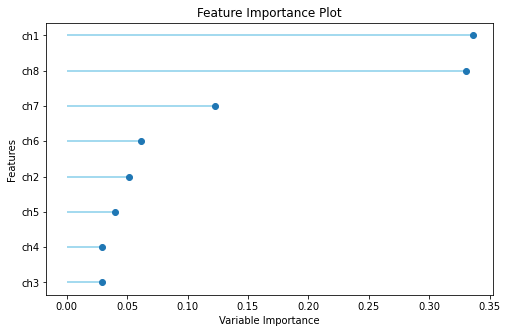

In [344]:
plot_model(et, 'feature')

In [345]:
#interpret_model(et)

In [346]:
#interpret_model(et, plot = 'correlation')

In [347]:
#interpret_model(et, plot = 'reason', observation = 10)

In [348]:
#pred=predict_model(et, data=data_unseen)
#pred

In [349]:
#? predict_model

In [350]:
#save_model(et, 'savedmodelet')
#et_saved = load_model('savedmodelet')

In [351]:
#save_experiment('experiment')

In [352]:
#experiment_loaded = load_experiment('experiment')

In [ ]:
import pandas as pd
import time
import os
os.chdir("/home/ml/optiguardml/models")
dataset = pd.read_csv('DataRaw.csv')
dataset = dataset.loc[(dataset.mm >= 45) & (dataset.mm <= 145)]
dataset.reset_index(inplace=True, drop=True)
dataset = dataset.dropna()

dataset['offsetx_abs'] = dataset.offsetx.abs()

# drop too low levels

from pycaret.regression import *

for lowlevel in range(0, 10000, 100):
    data = dataset.sample(frac=0.5, random_state=786)
    data_unseen = dataset.drop(data.index).reset_index(drop=True)
    data.reset_index(drop=True, inplace=True)

    for i in range(1,9):
            data.iloc[:,i] = [0 if j < lowlevel else j for j in data.iloc[:,i]]

    es = setup(data = data, target = 'mm', ignore_features=['offsetx', 'offsetx_abs'], silent=True)
    print(f'lowlevel: {lowlevel}')
    et = create_model('et')
    time.sleep(10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8105,62.5965,7.9118,0.9244,0.0988,0.0384
1,2.2517,43.5682,6.6006,0.9459,0.0863,0.0316
2,2.5475,42.1084,6.4891,0.9537,0.0954,0.0401
3,2.7292,68.1901,8.2577,0.9151,0.1013,0.0357
4,3.1126,68.1046,8.2525,0.9257,0.1088,0.0438
5,2.3710,45.3006,6.7306,0.9437,0.0875,0.0320
6,2.7853,61.9058,7.8680,0.9221,0.1010,0.0386
7,2.7197,50.1772,7.0836,0.9425,0.0981,0.0416
8,3.2691,79.2181,8.9005,0.9071,0.1155,0.0463
9,2.7355,72.2182,8.4981,0.9115,0.1064,0.0373
